In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn.neighbors import KNeighborsClassifier
import os

%matplotlib notebook

In [2]:
# search for csv location

found = []

def find(name,path):
    path = os.getcwd() + path
    file = name

    for root, dir, files in os.walk(path):
        for item in files:
            if file == item:
                return os.path.join(root, file)
        return None
data = ['00', '01', '02', '03', '05', '22', '23', '24', '25']
for d in data:
    found.append(find('data_' + d + '.csv.gz', '/irc-sphere-sleep-56db93f64661/sphere-sensor-data'))
    found.append(find('data_' + d + '.csv', '/irc-sphere-sleep-56db93f64661/sphere-sensor-data'))
found

['/Users/horken7/Documents/UoB/MDM3/circadian-rhytm/irc-sphere-sleep-56db93f64661/sphere-sensor-data/data_00.csv.gz',
 None,
 '/Users/horken7/Documents/UoB/MDM3/circadian-rhytm/irc-sphere-sleep-56db93f64661/sphere-sensor-data/data_01.csv.gz',
 None,
 '/Users/horken7/Documents/UoB/MDM3/circadian-rhytm/irc-sphere-sleep-56db93f64661/sphere-sensor-data/data_02.csv.gz',
 None,
 '/Users/horken7/Documents/UoB/MDM3/circadian-rhytm/irc-sphere-sleep-56db93f64661/sphere-sensor-data/data_03.csv.gz',
 None,
 '/Users/horken7/Documents/UoB/MDM3/circadian-rhytm/irc-sphere-sleep-56db93f64661/sphere-sensor-data/data_05.csv.gz',
 None,
 '/Users/horken7/Documents/UoB/MDM3/circadian-rhytm/irc-sphere-sleep-56db93f64661/sphere-sensor-data/data_22.csv.gz',
 None,
 '/Users/horken7/Documents/UoB/MDM3/circadian-rhytm/irc-sphere-sleep-56db93f64661/sphere-sensor-data/data_23.csv.gz',
 None,
 '/Users/horken7/Documents/UoB/MDM3/circadian-rhytm/irc-sphere-sleep-56db93f64661/sphere-sensor-data/data_24.csv.gz',
 None,


In [3]:
# load file

df = []
for path in found:
    if path is not None:
        if 'gz' in path:
            fileName = path
            df.append(pd.read_csv(fileName, index_col='datetime', compression='gzip'))
        else: 
            fileName = path
            df.append(pd.read_csv(fileName, index_col='datetime'))

//anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
df[0]

,cold-water,door,dust,electricity,hid,hot-water,humidity,light,motion,noise,temperature,uid,aid,wearable-mag-xl1,wearable-rss,wearable-xl1-x,wearable-xl1-y,wearable-xl1-z
datetime,,,,,,,,,,,,,,,,,,
2016-05-31 21:59:59.919856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0aa05543a5c2,0xb827eb524fec,-0.050446,-86.0,-0.648,0.238,-0.652
2016-05-31 21:59:59.969904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0aa05543a5c2,0xb827eb524fec,-0.104310,-86.0,-0.574,0.472,-0.500
2016-05-31 22:00:00.019952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0aa05543a5c2,0xb827eb524fec,-0.087636,-86.0,-0.690,0.338,-0.492
2016-05-31 22:00:00.070000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0aa05543a5c2,0xb827eb524fec,-0.081416,-86.0,-0.658,0.396,-0.504
2016-05-31 22:00:00.119856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0aa05543a5c2,0xb827eb524fec,-0.143680,-86.0,-0.656,0.328,-0.442
2016-05-31 22:00:00.169904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0aa05543a5c2,0xb827eb524fec,-0.014990,-86.0,-0.672,0.608,-0.386
2016-05-31 22:00:00.219952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0aa05543a5c2,0xb827eb524fec,-0.133151,-86.0,-0.648,0.318,-0.480
2016-05-31 22:00:00.243000,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.000,NaN,NaN,NaN,S2_B2,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-31 22:00:00.243000,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,50.0,NaN,S2_B2,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# resample the data and get mean as feature
# (resample to lower dataset size and make program faster)

features = []
for data in df:
    data.index = pd.DatetimeIndex(data.index)
    data = data.resample('5S').mean()
    dayFeature = []
    for d in data:
        a = data[d]
        dayFeature.append(a.mean())
    features.append(dayFeature)
features[0]

[0.005968344503065736,
 0.7838004298941866,
 0.10424004398148495,
 53.67732238809948,
 1.0,
 0.0,
 77.37669758597877,
 6.695466418981473,
 0.0037005621693121677,
 66.5400300925934,
 21.88912549052078,
 0.0032885651811382995,
 -83.64714915673282,
 0.21583793988141206,
 -0.0260680735604578,
 0.41097553413003995]

In [5]:
# put 2/3 of data into trainingFeatures and rest into testingFeatures
trainingFeatures = []
testingFeatures = []
trainingAmount = int(2*len(features)/3)
testingAmount = len(features)-trainingAmount
for i in range(trainingAmount):
    trainingFeatures.append(features[i])
for i in range(testingAmount):
    testingFeatures.append(features[i+trainingAmount])

In [16]:
# cluster and label data using K-means into n clusters
labels = KMeans(n_clusters=4).fit_predict(trainingFeatures)
labels

array([3, 3, 0, 2, 1, 0], dtype=int32)

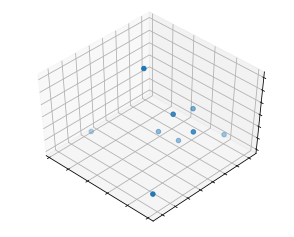

In [17]:
# make PCA (dimensionality reduction) to 3D and plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(features)
X = pca.transform(features)

# only needed for non int labels (I think)
# y = np.choose(label, [1, 2, 0]).astype(np.float)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], label=labels ,cmap='spring') # alt. cmap=plt.cm.spectral ## removed labels

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.show()

In [8]:
# load sleep diaries

path = find('Sleep Data Research - ASD Morning.csv','/irc-sphere-sleep-56db93f64661/Sphere-csv-data/')

if path is not None:
    if 'gz' in path:
        fileName = path
        data = pd.read_csv(path, skiprows=1, index_col='Participant', compression='gzip')
    else: 
        data = pd.read_csv(path, skiprows=1, index_col='Participant')
data

,Date,Time in Bed,Time to Sleep,Time to fall asleep (minutes),Wake up time,Time to get up,Quality of Sleep,How Refreshed,Normal Night,Comments
Participant,,,,,,,,,,
1,01/06,23:00,23:30,5,07:00,07:00,Poor,Somewhat,Yes,-
1,02/06,23:30,00:00,5,06:30,06:30,Fair,Somewhat,Yes,-
1,03/06,23:00,23:30,5,07:00,07:00,Fair,Somewhat,Yes,-
14,20/04,23:00,23:10,60,08:20,08:25,Fair,Refreshed,No,woken by very noisy birds in the morning
14,21/04,22:30,23:00,60,07:55,08:00,Fair,Refreshed,No,Car alarm went off in the night
14,22/04,23:30,00:30,30,08:50,08:50,Good,Refreshed,Yes,NaN
14,23/04,23:30,01:30,20,08:40,10:00,Very Good,Refreshed,Yes,NaN
14,24/04,23:00,01:30,15,10:00,10:15,Very Good,Refreshed,Yes,NaN
14,25/04,23:00,01:30,60,08:20,08:20,Good,Refreshed,Yes,NaN


In [9]:
# convert 'Quality of Sleep' to numeric labels
labels = []
for d in data['Quality of Sleep']:
    if(d == 'Poor'):
        labels.append(0)
    elif(d == 'Fair'):
        labels.append(1)
    elif(d == 'Good'):
        labels.append(2)
    else:
        labels.append(3)

# get only labels for trainingData
trainingLabels = []
for i in range(trainingAmount):
    trainingLabels.append(labels[i])

In [10]:
# fit data to labels
knn = KNeighborsClassifier()
knn.fit(trainingFeatures, trainingLabels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

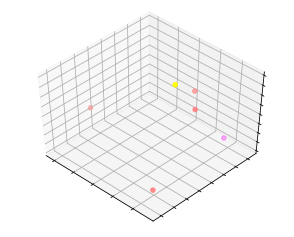

In [11]:
# make PCA (dimensionality reduction) to 3D and plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(trainingFeatures)
X = pca.transform(trainingFeatures)

# only needed for non int labels (I think)
# y = np.choose(label, [1, 2, 0]).astype(np.float)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=trainingLabels, cmap='spring') # alt. cmap=plt.cm.spectral

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.show()

In [12]:
testingLabels = knn.predict(testingFeatures)
testingLabels

array([1, 1, 1])

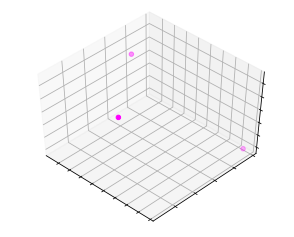

In [13]:
# make PCA (dimensionality reduction) to 3D and plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(testingFeatures)
X = pca.transform(testingFeatures)

# only needed for non int labels (I think)
# y = np.choose(label, [1, 2, 0]).astype(np.float)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=testingLabels, cmap='spring') # alt. cmap=plt.cm.spectral

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.show()